Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Pour analyser les données, afin de ne pas être obligés à chaque ouverture de run tout le code, on utilise directement le fichier csv créé.

In [30]:
final_data = pd.read_csv("Base finale.csv")

Partie 1: Statistiques descriptives

Avant de commencer cette partie, il nous parait pertinent de distinguer les tops fnac, babelio et des bibliothèques de Paris des données récupérées sur Livraddict et sur Wikipedia sur les prix littéraires. En effet, les trois premières bases mentionnées présentent les livres les plus populaires, c'est-à-dire les plus lus. Sur les bases Livraddict et Wikipedia, la liste de livres correspond aux livres jugés de meilleure qualité, que ce soit par les internautes ou par les spécialistes.

A) Analyse des prix littéraires

Plusieurs questions se posent à nous. Les livres populaires sont-ils aussi les livres les mieux notés ? Cela varie-t-il selon les plateformes considérées ? C'est-à-dire est-ce que les livres populaires sont-ils mieux représentés dans les listes de prix littéraires ou dans les classements de qualité faits par les internautes ? 

Tout d'abord, déterminons le nombre de livres populaires qui sont aussi dans les bases des prix littéraires et du classement des utilisateurs de Livraddict.

In [37]:
# on modifie la table pour créer une fonction qui renvoie quel type d'entité a reconnu la qualité du livre populaire 
# selon s'il est sur la base des prix, celle Livraddict, ou les deux

def reconnu(row):
    if row['prix_19_23'] == 1 and ((row['top_fnac_1'] == 1) or (row['top_babelio'] == 1) or (row['Top bibliothèque'] == 1)) and (row['top_livraddict'] == 0):
        reconnu = 'Critique'
    elif row['prix_19_23'] == 0 and ((row['top_fnac_1'] == 1) or (row['top_babelio'] == 1) or (row['Top bibliothèque'] == 1)) and (row['top_livraddict'] == 1):
        reconnu = 'Internautes'
    elif (row['prix_19_23'] == 1) and (row['top_livraddict'] == 1) and ((row['top_fnac_1'] == 1) or (row['top_babelio'] == 1) or (row['Top bibliothèque'] == 1)):
        reconnu = 'Critique et internautes'
    else:
        reconnu = 'Aucun'
    return reconnu

In [38]:
final_data['Reconnu par'] = final_data.apply(reconnu, axis=1)

In [39]:
prix_counts = final_data['Reconnu par'].value_counts()
prix_proportions = final_data['Reconnu par'].value_counts(normalize=True) * 100

print("Nombre de livres dont la qualité est reconnue institutionnellement et par qui:")
print(prix_counts)
print("\nProportion de livres dont la qualité est reconnue institutionnellement et par qui (%):")
print(prix_proportions)

Nombre de livres dont la qualité est reconnue institutionnellement et par qui:
Reconnu par
Aucun          474
Critique        11
Internautes      6
Name: count, dtype: int64

Proportion de livres dont la qualité est reconnue institutionnellement et par qui (%):
Reconnu par
Aucun          96.537678
Critique        2.240326
Internautes     1.221996
Name: proportion, dtype: float64


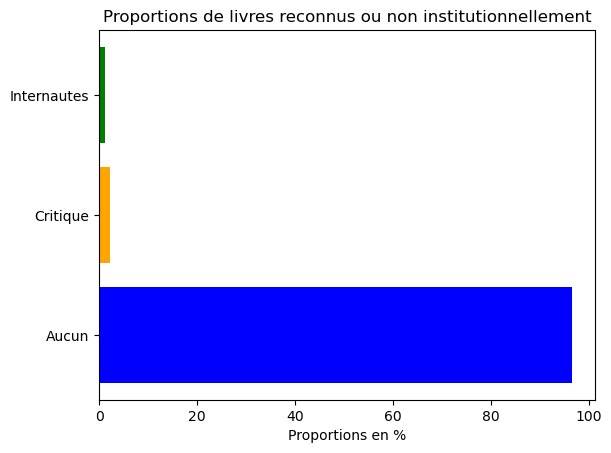

In [34]:
# Visualisation des prix littéraires
categories = ["Aucun", "Critique", "Internautes"]
plt.barh(categories, prix_proportions, color=['blue', 'orange', 'green'])
#plt.xscale('log')  # On applique l'échelle logarithmique pour que les petites valeurs soient mieux représentées

plt.xlabel('Proportions en %')
plt.title('Proportions de livres reconnus ou non institutionnellement')
plt.show()

On observe  une proportion très petite de livres reconnus institutionnellement parmi les plus populaires.

On pourrait ainsi penser qu'il y a une dissociation entre les livres les plus lus et les mieux notés sur les applications et ceux ayant un prix. L'intersection est presque vide. On peut alors postuler d'une part que les livres de type best-sellers ne sont pas ceux qui sont primés ( les livres les plus primés illustrant le mécanisme de distinction théorisé par Bourdieu des élites). D'autre part, pour les autres bases, l'échantillon des lecteurs consignant les livres qu'ils ont lu et les notant dans les applications dédiées à cela n'est peut-être pas du tout représentatif. Ils pourraient par exemple venir majoritairement de milieux sociaux plutôt extérieurs à la culture légitime et donc du fait de cette caractéristique ne pas s'intéresser aux livres primés et avoir des critères de notation différents.

Nous pensions que la deuxième hypothèse était probable, sauf qu'étonnamment, il y a encore moins de livres populaires parmi les mieux notés sur Livraddict. Sauf que cela est peut-être du au fait qu'il y a bien plus de livres renseignés comme ayant un prix sur Livraddict. De plus, il n'y avait de classement tel disponible sur Livraddict que pour 2023 alors que nous avons pu prendre tous les prix littéraires entre 2019 et 2023 lors du scrapping wikipedia. La comparaison de ces deux bases n'est donc peut-être pas pertinente.

Avant de passer à une étape ultérieure, observons quand même s'il y a une intersection entre les livres jugés de qualités sur Livraddict et ceux jugés de qualités par les professionnels octroyant les prix littéraires. Gardons néanmoins à l'esprit le fait que la base de Livraddict ne comporte que des livres publiés en 2023. Ainsi pour comparer les deux bases, ne conservons que les prix octroyés en 2023.

In [ ]:
# on crée une base avec que les livres reconnus pour voir l'intersection sans s'occuper du reste
df_reconnus = final_data[((final_data['prix_19_23'] == 1) & (final_data['Année'] == 2023)) | (final_data['top_livraddict'] == 1)]

In [ ]:
def reconnu_bis(row):
    if row['prix_19_23'] == 1 and (row['top_livraddict'] == 0):
        reconnu = 'Critique'
    elif row['prix_19_23'] == 0 and (row['top_livraddict'] == 1):
        reconnu = 'Internautes'
    elif (row['prix_19_23'] == 1) and (row['top_livraddict'] == 1):
        reconnu = 'Critique et internautes'
    else:
        reconnu = 'Aucun'
    return reconnu

In [42]:
df_reconnus.loc[:, 'Reconnu par'] = df_reconnus.apply(reconnu_bis, axis=1)

In [ ]:
commun = df_reconnus['Reconnu par'].value_counts()
commun_proportions = df_reconnus['Reconnu par'].value_counts(normalize=True) * 100

print("Nombre de livres en 2023 parmi les reconnus ayant obtenu un prix ou des bonnes notes d'internautes:")
print(commun)
print("\nProportion de livres en 2023 parmi les reconnus ayant obtenu un prix ou des bonnes notes d'internautes (%):")
print(commun_proportions)

Nombre de livres parmi les reconnus ayant obtenu un prix ou des bonnes notes d'internautes:
Reconnu par
Internautes    85
Critique       53
Name: count, dtype: int64

Proportion de livres parmi les reconnus ayant obtenu un prix ou des bonnes notes d'internautes (%):
Reconnu par
Internautes    61.594203
Critique       38.405797
Name: proportion, dtype: float64


En 2023, il n'y a pas d'intersection entre les livres les mieux notés sur Livraddict et ceux ayant obtenus un prix. Cette observation est très intéressante. On pourrait penser que les livres ne se voient pas forcément accordés un prix l'année de leur parution, sauf que pour de nombreux livres de la base Wikipedia, l'année de parution coincide avec l'année à laquelle le livre a reçu son ou ses prix.

In fine, on peut surtout en conclure que nos bases sur la reconnaissance institutionnelle des livre sont complémentaires. Elles permettent d'explorer deux formes de reconnaissance, et d'élargir notre analyse sur le lien entre note des livres et popularité.

Ainsi, par la suite, nous allons surtout analyser une par une les bases de popularité, et les comparer entre elles. 

Tout d'abord, visualisons de manière générale la base. Tout d'abord, il est utile de savoir combien de livres proviennent de quelles bases, de voir quelle base fournit le plus de livres populaires, afin de pouvoir mieux interpréter les données.

In [51]:
df_popularity = final_data[
    (final_data['top_fnac_1'] == 1) | 
    (final_data['top_fnac_2_plus'] == 1) | 
    (final_data['top_babelio'] == 1) | 
    (final_data['Top bibliothèque'] == 1)
]

In [53]:
# Comptage et proportions pour chaque top
tops = ['top_fnac_1', 'top_babelio', 'Top bibliothèque']
for top in tops:
    print(f"\nAnalyse pour {top}:")
    counts = df_popularity[top].value_counts()
    proportions = df_popularity[top].value_counts(normalize=True) * 100
    print(f"Nombre de livres :\n{counts}")
    print(f"Proportions (%):\n{proportions}")


Analyse pour top_fnac_1:
Nombre de livres :
top_fnac_1
0.0    96
1.0    69
Name: count, dtype: int64
Proportions (%):
top_fnac_1
0.0    58.181818
1.0    41.818182
Name: proportion, dtype: float64

Analyse pour top_babelio:
Nombre de livres :
top_babelio
0.0    141
1.0     24
Name: count, dtype: int64
Proportions (%):
top_babelio
0.0    85.454545
1.0    14.545455
Name: proportion, dtype: float64

Analyse pour Top bibliothèque:
Nombre de livres :
Top bibliothèque
1.0    86
0.0    79
Name: count, dtype: int64
Proportions (%):
Top bibliothèque
1.0    52.121212
0.0    47.878788
Name: proportion, dtype: float64


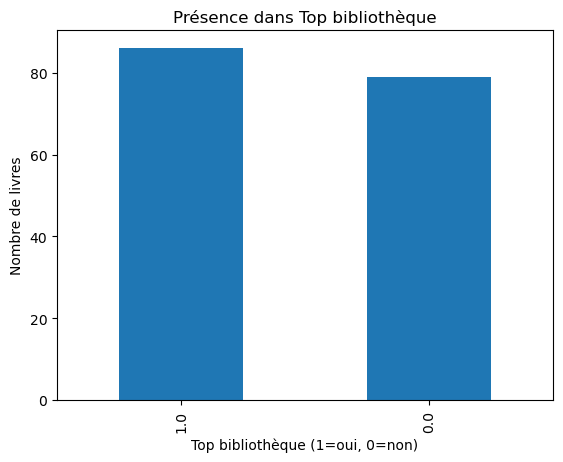

In [54]:
# Visualisation
title = "nombre de livres par top"
counts.plot(kind='bar', title=f'Présence dans {top}', ylabel='Nombre de livres', xlabel=f'{top} (1=oui, 0=non)')
plt.show()

Sans surprise, il y a une claire sous-représentation des livres issus de Babelio. Les livres issus des bases de données des bibliothèques de Paris sont les plus nombreux.

In [ ]:
# Comptage et proportions pour chaque top
tops = ['top_fnac_1', 'top_fnac_2_plus', 'top_babelio', 'top_livraddict', 'any_top_indicator']
for top in tops:
    print(f"\nAnalyse pour {top}:")
    counts = final_data[top].value_counts()
    proportions = final_data[top].value_counts(normalize=True) * 100
    print(f"Nombre de livres :\n{counts}")
    print(f"Proportions (%):\n{proportions}")

"""
Sur les 229 livres
78 des livres sont dans au moins un top fnac du mois
28 sont dans 2 top fnac ou plus (on eté plusieurs mois d'affilé dans le top fnac)
25 sont dans le top babelio 2023
85 sont dans le top livraddict 2023

59 sont dans au moins un des top fnac, babelio ou livraddict
"""

# Visualisation
title = "nombre de livres par top"
counts.plot(kind='bar', title=f'Présence dans {top}', ylabel='Nombre de livres', xlabel=f'{top} (1=oui, 0=non)')
plt.show()

# ------------ Prix et présence dans les tops -------------
"""
on croise prix_19_20 avec any_top_indicator 
pour afficher la proportion de livres primés présents ou non dans les tops
"""

print("\n--- Prix et présence dans les tops ---")

prix_et_any_top = pd.crosstab(final_data['prix_19_20'], final_data['any_top_indicator'], normalize='index') * 100

print("Proportion de livres primés présents ou non dans les tops (%):")
print(prix_et_any_top)

prix_et_any_top.plot(kind='bar', stacked=True, title='Prix littéraire et présence dans les tops', ylabel='Proportion (%)', xlabel='Prix littéraire (1=oui, 0=non)')
plt.show()

"""
Parmi les livres primés (prix_19_20 = 1), seulement 7.81% sont 
présents dans un top, tandis que 92.19% ne figurent dans aucun top. 
Cela suggère que les livres primés ne sont pas nécessairement plus représentés 
dans les tops par rapport aux livres non primés.
"""

# ------------ Fréquence des auteurs -------------
print("\n--- Fréquence des auteurs ---")

auteur_counts = final_data['Auteur'].value_counts()

print("Nombre de livres par auteur :")
print(auteur_counts)

auteur_counts.head(10).plot(kind='bar', title='Top 10 des auteurs par nombre de livres', ylabel='Nombre de livres', xlabel='Auteur')
plt.show()

"""
Les auteurs Sarah Rivens et Mr Tan se démarquent avec 4 livres chacun, 
suivis par Sibylle Grimbert et Neige Sinno avec 3 livres. Cependant, la majorité des 204 auteurs 
n'ont écrit qu'un seul livre, illustrant une forte diversité mais une faible répétition dans 
les contributions des auteurs.
"""

# ------------ Livres présents dans plusieurs tops -------------
print("\n--- Livres présents dans plusieurs tops ---")
tops_columns = ['top_fnac_1', 'top_babelio', 'top_livraddict']
final_data['multiple_tops'] = (final_data[tops_columns].sum(axis=1) >= 2).astype(int)
multiple_tops_counts = final_data['multiple_tops'].value_counts()
multiple_tops_proportions = final_data['multiple_tops'].value_counts(normalize=True) * 100

print("Nombre de livres présents dans au moins deux tops :")
print(multiple_tops_counts)
print("\nProportion de livres présents dans au moins deux tops (%):")
print(multiple_tops_proportions)

multiple_tops_counts.plot(kind='bar', title='Livres présents dans au moins deux tops', ylabel='Nombre de livres', xlabel='Présence dans plusieurs tops (1=oui, 0=non)')
plt.show()

"""
Seulement 17 livres (7,42%) sont présents dans au moins deux tops, 
tandis que la grande majorité (212 livres, 92,58%) n’apparaissent que 
dans un seul top ou aucun. Cela montre que peu de livres réussissent à 
se démarquer de manière significative dans plusieurs classements.
"""